# MD2DS - Master in Data Science and Statistical Learning

**Numerical Calculus and Linear Algebra**

Lecture 03: least square approximation

Deadline: 31/03/2022

In [2]:
# Install packages
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Exercise 1

Let $\mathbf{x} = \left(-1,-0.2,-0.2,-0.5,-0.1,0,0,0,0.5,1\right)^T$, $\mathbf{y}=\left(1.2, 4.2, 4.9, 2.8, 3.5, 3.7, 4.2, 4.1, 4.2, 6\right)^T$.
1.  Implement the least square polynomial approximation of degree $1$ via QR decomposition with respect to vertical and horizontal residuals. Print the related RMS errors.
2.  In the same figure, plot
  - the data points,
  - both the degree-1 polynomial approximations,
  - at each data point the vertical (horizontal) residual related to the first (second) polynomial (use dashed lines and different colors).
3.  Comment the results.

In [3]:
def horner(c, x):
    
    # n = polynomial order
    n = len(c)
    
    value = np.zeros(len(x))
    
    value[:] = c[n - 1]
    
    for i in range(n - 2, -1, -1):
        
        value = value * x + c[i]  # * : element by element multiplication; @ : matrix multiplication

    return value


------------------------------------------------
    QR least square polynomial approximation    
------------------------------------------------
        x RMS err             y RMS err       

        5.99e-01              2.53e-01   
------------------------------------------------



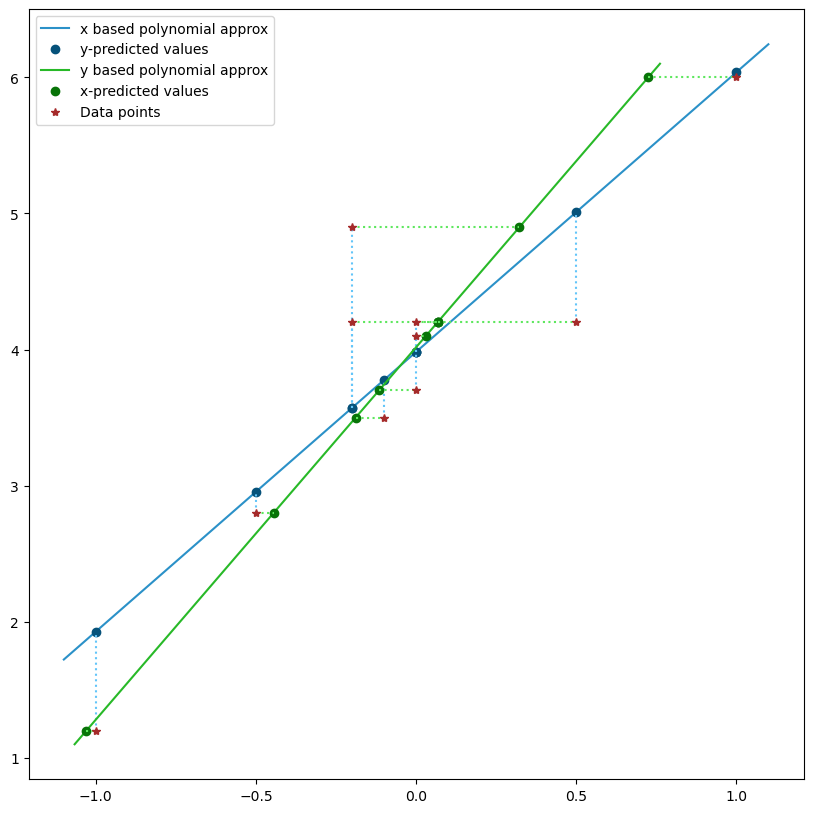

In [4]:
x = np.array([-1, -0.2, -0.2, -0.5, -0.1, 0., 0., 0., 0.5, 1.])

y = np.array([1.2, 4.2, 4.9, 2.8, 3.5, 3.7, 4.2, 4.1, 4.2, 6.])

N = len(x)

x_tab = np.linspace(x.min()-0.1, x.max()+0.1) 
y_tab = np.linspace(y.min()-0.1, y.max()+0.1) 


# x - residuals
Ax      = np.vander(x, 2, increasing = True)     # Vandermonde matrix, order = 2

Qx, Rx  = np.linalg.qr(Ax, mode = 'complete')    # by default the reduced QR decomposition is computed; with mode='complete' we ask the full qr decomposition, 
                                                 # necessary to compute the residuals
g_x     = Qx.transpose() @ y

coef_x  = np.linalg.solve(Rx[0:2, :], g_x[0:2])

p_x     = horner(coef_x, x)

p_tab_x = horner(coef_x, x_tab)

res_x   = math.sqrt((g_x[2:] @ g_x[2:]) / N)


# y - residuals
Ay      = np.vander(y, 2, increasing = True)     # Vandermonde matrix, order = 2

Qy, Ry  = np.linalg.qr(Ay, mode = 'complete')    # by default the reduced QR decomposition is computed; with mode='complete' we ask the full qr decomposition, 
                                                 # necessary to compute the residuals
g_y     = Qy.transpose() @ x

coef_y  = np.linalg.solve(Ry[0:2, :], g_y[0:2])

p_y     = horner(coef_y, y)

p_tab_y = horner(coef_y, y_tab)

res_y   = math.sqrt((g_y[2:] @ g_y[2:]) / N)


# Display
print('------------------------------------------------')
print('    QR least square polynomial approximation    ')
print('------------------------------------------------')
print('        x RMS err             y RMS err       \n')
print(f'        {res_x:.2e}              {res_y:.2e}   ')
print('------------------------------------------------\n')


fig = plt.figure()
fig.set_size_inches(10, 10)

col_cold  = ['#63C5F9', '#2B91C8', '#06527A']  # blue, grow int
col_nat   = ['#5EE75E', '#28B928', '#087408']  # green, grow int

# x poly-approx
plt.plot(x_tab, p_tab_x, '-', color = col_cold[1], label = 'x based polynomial approx')
plt.plot(    x,     p_x, 'o', color = col_cold[2], label = 'y-predicted values')

plt.vlines(x, np.minimum(y, p_x), np.maximum(y, p_x), linestyle = ':', color = col_cold[0], linewidth = 1.5) 


# y poly-approx
plt.plot(p_tab_y, y_tab, '-', color = col_nat[1], label = 'y based polynomial approx')
plt.plot(    p_y,     y, 'o', color = col_nat[2], label = 'x-predicted values')

plt.hlines(y, np.minimum(x, p_y), np.maximum(x, p_y), linestyle = ':',  color = col_nat[0], linewidth = 1.5)


# Starting points
plt.plot(x, y, '*', color = "brown", label = 'Data points')

plt.legend()
plt.show()


Treating data considering x or y coordinates, by a QR ls approximation, lead to 2 different polynoms.

In this case, y values are more than double precisely approximated than x-based ones, thus y RMS error is around half compared to x one.


# Exercise 2

Let $P(x) = x^3 + x^2 -x +2$ be a polynomial of degree $3$ and $\mathbf{x} = (0, .25, .25, .5, .5, .5, .75, .75, 1, 1, 1)^T\in\mathbb{R}^{11}$. For $i=0,\dots, 10$, define $y_i = P(x_i)(1+e_i)$,
where $e_i\in[-5\cdot10^{-2}, 5\cdot10^{-2}]$ is a (pseudo)random number.
1.  For $n=1,3,5$ implement the least square polynomial approximation of degree $n$ via SVD decomposition (use the numpy command `np.linalg.svd(Matrix)`). For each $n$ print the approximation errors and RMS errors.
2.  Evaluate $P(x)$ and each polynomial approximation $P_n(x)$ on $201$ equally spaced abscissa $x_i\in[0,1]$ with the Horner algorithm and make a plot dislpaying 
  - the data $(x_i, y_i)$ for $i=0,\dots,10$,
  - the groundtruth polynomial $P(x)$,
  - the least square approximaitons $P_n(x)$ for each $n$.
3. Comment the results and in particular say if it could be used also the QR decomposition.

In [5]:
# DATA
N = 11
x = np.array([0, .25, .25, .5, .5, .5, .75, .75, 1, 1, 1])

# pseudonumer in [a, b]
a = -5.e-2
b =  5.e-2

e = np.random.rand(N) * (b-a) + a

# P(x) = 1•x^3 + 1•x^2 - 1•x + 2
coefs = [2, -1, 1, 1]

px = horner(coefs, x)

y = px * (1 + e)

xtab = np.linspace(0, 1, 201)

ptab = horner(coefs, xtab)


----------------------------------------------------
    SVD least square polynomial approximation       
----------------------------------------------------
    degree        err_p             res             
    n = 1         8.47e-01          9.00e-01     
    n = 3         1.12e-01          1.30e-01     
    n = 5         1.22e-01          1.21e-01     
----------------------------------------------------



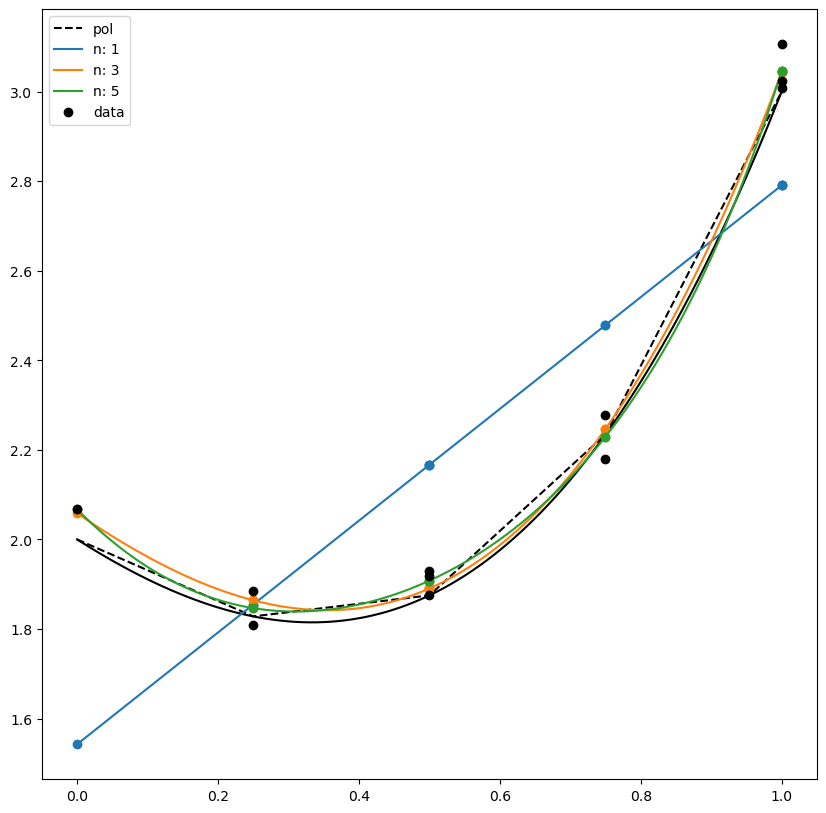

In [6]:
# Display
fig = plt.figure()
fig.set_size_inches(10, 10)

color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']
plt.plot(xtab, ptab, 'k')
plt.plot(x, px, '--k', label = 'pol')

print('----------------------------------------------------')
print('    SVD least square polynomial approximation       ')
print('----------------------------------------------------')
print('    degree        err_p             res             ')


for i,n in enumerate([1, 3, 5]):  # enumerate returns the index position and the corresponding value of the list 
    
    A        = np.vander(x, n + 1, increasing = True)  # Vandermonde matrix, order   = n + 1
    # print(f"\n{A}\n")
    
    Rk       = np.linalg.matrix_rank(A)
    # print(f"\nRank = {Rk}\n")
    # print(f"\nn = {n}\n")
    
    U, S, Vh = np.linalg.svd(A)
    
    g        = U.transpose() @ y
    
    if n < Rk:
        zn = g[0 : n+1] / S
        
    else:
        zn = g[0:n] / S[0:n]
        zn = np.append(zn,0)  # in case of n > Rk, add a 0 as last value
    
    # print(f"\nzn = {zn}\n")
    
    cn       = Vh.transpose() @ zn
    
    p_pred   = horner(cn, x)
    
    polytab  = horner(cn, xtab)
    
    res      = np.linalg.norm(y - p_pred)
    
    error_p  = np.linalg.norm(px - p_pred)      # comparison with the exact data

    plt.plot(xtab, polytab, '-', color = color_list[i], label = 'n: '+ str(n))
    plt.plot(   x,  p_pred, 'o', color = color_list[i])
    
    print(f'    n = {n}         {error_p:.2e}          {res:.2e}     ')

print('----------------------------------------------------\n')

plt.plot(x, y, 'o', color = 'k', label = 'data')
plt.legend()
plt.show()


Using n = 3 instead of n = 1, the error drop down. Meanwhile, from n = 3 to n = 5, on the contrary, the error is quiete steady.

Moreover, for n = 5, the rank(A) is 5, which isn't maximum (6), thus by adding a zero as last value SVD can be performed.